## Assignment-03 First Step of Machine Learning: Model and Evaluation

同学们，今天我们的学习了基本的机器学习概念，相比你已经对机器学习的这些方法有一个基本的认识了。值得说明的是，机器学习不仅仅是一系列方法，更重要的是一种思维体系，即：依据以往的、现有的数据，构建某种方法来解决未见过的问题。而且决策树，贝叶斯只是实现这个目标的一个方法，包括之后的神经网络。很有可能有一天，神经网络也会被淘汰，但是重要的是我们要理解机器学习的目标，就是尽可能的自动化解决未知的问题。

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1571556399207&di=4a97dc15ad08dd49d3748d1edf6109b3&imgtype=0&src=http%3A%2F%2Fc.hiphotos.baidu.com%2Fzhidao%2Fwh%3D450%2C600%2Fsign%3Dae742c6aedcd7b89e93932873a146e91%2F5d6034a85edf8db1b16050c40223dd54574e74c7.jpg)

## Part-1 Programming Review 编程回顾

#### 1. Re-code the Linear-Regression Model using scikit-learning(10 points)

<评阅点>： 
> + 是否完成线性回归模型 (4')
+ 能够进行预测新数据(3')
+ 能够进行可视化操作(3')

In [1]:
# you code here
import numpy as np
random_data = np.random.random(size=(20,2))

In [2]:
import matplotlib.pyplot as plt
X = random_data[:, 0]
y = random_data[:, 1]

In [3]:
import random
def assuming_function(x):
    return 13.4 * x + random.randint(-5, 5)

In [4]:
y = [assuming_function(x) for x in X]

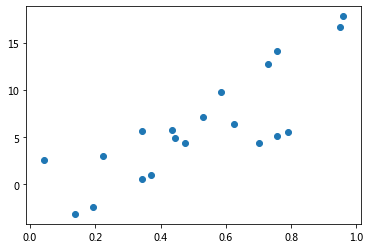

In [5]:
plt.scatter(X, y)

In [6]:
y = np.array(y)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
reg = LinearRegression().fit(X.reshape(-1,1),y) # X reshape -1 as single dimension

In [9]:
reg.predict(X.reshape(-1,1))

array([ 6.29152731, 10.32651844, 10.3324456 ,  9.85484621,  2.94725457,
       13.75695414,  0.86004952,  2.97646492, 13.91474311, 10.94373986,
        3.46809856,  0.29169777, -0.66623215,  7.27001474,  4.74814769,
        8.00227349,  5.30821604,  4.58119838, -2.37601447,  9.35931634])

In [10]:
reg.score(X.reshape(-1,1),y) # Return the coefficient of determination R^2 of the prediction

0.6759428237083939

In [11]:
reg.coef_ # Estimated coefficients for the linear regression problem

array([17.81539733])

In [12]:
reg.intercept_ # Independent term in the linear model

-3.1432265579502943

In [13]:
def f(x):
    return reg.coef_ * x + reg.intercept_ # return corresponding y of x for predicted lien drawing

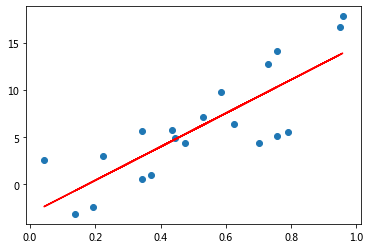

In [14]:
plt.scatter(X, y)
plt.plot(X, f(X), color='red')

#### 2. Complete the unfinished KNN Model using pure python to solve the previous Line-Regression problem. (8 points)

<评阅点>:
> + 是否完成了KNN模型 (4')
+ 是否能够预测新的数据 (4')

In [15]:
# you code here
def model(X, y):
    return [(Xi,yi) for Xi,yi in zip(X,y)]

In [16]:
from scipy.spatial.distance import cosine 
# Computes the Cosine distance between 1-D arrays.
# Cosine similarity is a measure of similarity between two non-zero vectors of an inner product 
# space that measures the cosine of the angle between them.
# The smaller the angle, higher the cosine similarity

In [17]:
def distance(x1, x2):
    return cosine(x1, x2)

In [18]:
def predict(x, k=5):
    # compare all x's and pick the top k ones that are similar
    most_similars = sorted(model(X, y), key=lambda xi : distance(xi[0], x))[:5]
    
    y_hats = [_y for x,_y in most_similars]
    
    print(most_similars)
    
    return np.mean(y_hats)

In [19]:
X, y

(array([0.52958425, 0.75607323, 0.75640593, 0.72959769, 0.34186614,
        0.94862777, 0.22470877, 0.34350575, 0.95748466, 0.79071862,
        0.37110175, 0.1928065 , 0.13903672, 0.58450795, 0.44295247,
        0.62561052, 0.47438979, 0.4335814 , 0.04306455, 0.701783  ]),
 array([ 7.09642898,  5.13138128, 14.13583944, 12.77660907,  0.58100629,
        16.71161216,  3.01109756,  5.60297709, 17.83029446,  5.59562953,
         0.97276344, -2.41639296, -3.13690795,  9.83240648,  4.9355631 ,
         6.38318102,  4.35682319,  5.80999078,  2.57706499,  4.40389213]))

In [20]:
myself_knn = model(X, y)

In [21]:
predict(0.9)

[(0.5295842521816975, 7.096428979234746), (0.756073229874662, 5.13138128032047), (0.7564059283449003, 14.135839439821664), (0.7295976920985374, 12.776609074120401), (0.34186614079393984, 0.581006286638794)]


7.9442530120272155

#### 3. Re-code the Decision Tree, which could sort the features by salience. (12 points)

<评阅点>
> + 是否实现了信息熵 (1' )
+ 是否实现了最优先特征点的选择(5')
+ 是否实现了持续的特征选则(6')

## 信息熵
$$ Entropy = -\sum_i^n Pr(x_i)log(Pr(x_i)) $$

## Gini纯度
$$ Gini = 1 - \sum_{i=1}^J P_i^2 $$

In [22]:
from icecream import ic # inspection library
from collections import Counter

In [23]:
# you code here
def entropy(elements):
    counter = Counter(elements)
    probs = [counter[c] / len(elements) for c in set(elements)] # count appearances in the elements
    ic(probs)
    return -sum(p * np.log(p) for p in probs)

In [70]:
def gini(elements):
    counter = Counter(elements)
    probs = [counter[c]/len(elements) for c in set(elements)]
    return 1 - sum(p**2 for p in probs)

In [74]:
gini([1,2])

0.5

In [24]:
entropy([1,1,1,1])

ic| probs: [1.0]


-0.0

In [25]:
entropy([1,1,1,0])

ic| probs: [0.25, 0.75]


0.5623351446188083

In [26]:
mock_data = {
    'gender': ['F', 'F', 'F', 'F', 'M', 'M', 'M'],
    'income': ['+10', '-10', '+10', '+10', '+10', '+10', '-10'],
    'family_number': [1, 1, 2, 1, 1, 1, 2],
#     'pet': [1,1,1,0,0,0,1],
    'bought': [1,1,1,0,0,0,1],
}

In [27]:
import pandas as pd

In [28]:
dataset = pd.DataFrame.from_dict(mock_data)
dataset

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
2,F,+10,2,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0
6,M,-10,2,1


In [29]:
# split by "some_feature".

# the process of decision tree uses minimum entropy (by "some_feature")

In [30]:
set(mock_data['family_number'])

{1, 2}

In [31]:
set(mock_data['gender'])

{'F', 'M'}

In [32]:
sub_split_1 = dataset[dataset['family_number'] == 1]['bought'].tolist()

In [33]:
splited_data = dataset[dataset['family_number'] == 1]

In [34]:
splited_data

,gender,income,family_number,bought
0,F,+10,1,1
1,F,-10,1,1
3,F,+10,1,0
4,M,+10,1,0
5,M,+10,1,0


In [35]:
sub_split_2 = dataset[dataset['family_number'] != 1]['bought'].tolist()

In [36]:
entropy(sub_split_1) + entropy(sub_split_2)

ic| probs: [0.6, 0.4]
ic| probs: [1.0]


0.6730116670092565

In [55]:
def find_the_optimal_splitter(training_data: pd.DataFrame, target: str) ->str:
    # number of features taking away the target feature
    x_fields = set(training_data.columns.tolist()) - {target}
    
    splitter = None
    min_entropy = float('inf')
    
    # for each feature
    for f in x_fields:
        ic(f)
        # select the conternt of the particular feature 
        values = set(training_data[f])
        ic(values)
        for v in values:
            sub_splitter_1 = training_data[training_data[f] == v][target].tolist()
            ic(sub_splitter_1)
            
            entropy_1 = entropy(sub_splitter_1)
            ic(entropy_1)
            
            sub_splitter_2 = training_data[training_data[f] != v][target].tolist()
            ic(sub_splitter_2)
            
            entropy_2 = entropy(sub_splitter_2)
            ic(entropy_2)
            
            entropy_v = entropy_1 + entropy_2
            ic(entropy_v)
            
            if entropy_v <= min_entropy:
                min_entropy = entropy_v
                spliter = (f, v)
#     print('spliter is: {}'.format(spliter))
#     print('the min entropy is: {}'.format(min_entropy))
    
    return spliter

In [56]:
find_the_optimal_splitter(training_data=dataset, target='bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_splitter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_splitter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_splitter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_splitter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_splitter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_splitter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_splitter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_splitter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_splitter

('family_number', 2)

In [39]:
find_the_optimal_splitter(dataset[dataset['family_number'] == 1], 'bought')

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_splitter_1: [0, 0]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_splitter_2: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 0.6365141682948128
ic| sub_splitter_1: [1, 1, 0]
ic| probs: [0.3333333333333333, 0.6666666666666666]
ic| entropy_1: 0.6365141682948128
ic| sub_splitter_2: [0, 0]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6365141682948128
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_splitter_1: [1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_splitter_2: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 0.5623351446188083
ic| sub_splitter_1: [1, 0, 0, 0]
ic| probs: [0.75, 0.25]
ic| entropy_1: 0.5623351446188083
ic| sub_splitter_2: [1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.5623351446188083
ic| f: 'family_number'
ic| values: {1}
ic| sub_splitter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730

spliter is: ('income', '+10')
the min entropy is: 0.5623351446188083


('income', '+10')

#### 4. Finish the K-Means using 2-D matplotlib (8 points)

In [40]:
from sklearn.cluster import KMeans

In [41]:
X1 = [random.randint(0,100) for _ in range(100)]
X2 = [random.randint(0,100) for _ in range(100)]

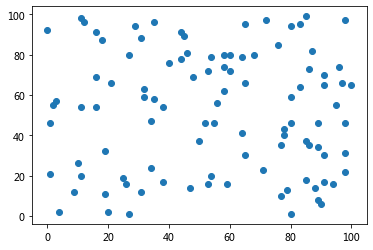

In [42]:
plt.scatter(X1, X2)

In [43]:
training_data = [[x1, x2] for x1, x2 in zip(X1, X2)]

In [44]:
cluster = KMeans(n_clusters=6, max_iter=500)

In [45]:
cluster.fit(training_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [46]:
cluster.cluster_centers_

array([[54.65      , 73.55      ],
       [79.85714286, 26.10714286],
       [20.08333333, 56.83333333],
       [87.5       , 77.5       ],
       [21.4       , 15.26666667],
       [19.88888889, 91.33333333]])

In [47]:
cluster.labels_

array([5, 5, 4, 4, 3, 2, 1, 0, 2, 1, 4, 1, 3, 5, 4, 2, 1, 0, 0, 4, 0, 1,
       0, 1, 5, 2, 0, 2, 3, 0, 0, 3, 1, 0, 4, 1, 2, 4, 0, 1, 1, 4, 1, 4,
       3, 1, 5, 5, 3, 0, 3, 1, 2, 0, 1, 4, 3, 1, 4, 1, 3, 0, 5, 2, 0, 1,
       1, 3, 4, 2, 2, 3, 4, 4, 3, 3, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 3,
       0, 0, 5, 4, 3, 1, 3, 1, 0, 0, 5, 2], dtype=int32)

In [48]:
from collections import defaultdict

In [49]:
centers = defaultdict(list)

In [50]:
for label, location in zip(cluster.labels_, training_data):
    centers[label].append(location)

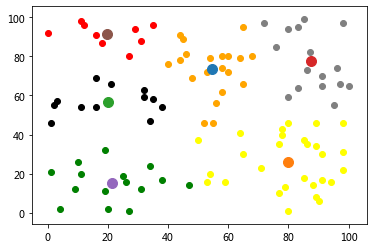

In [51]:
color = ['red','green','grey','black','yellow','orange']

for i,c in enumerate(centers):
    for location in centers[c]:
        plt.scatter(*location, c=color[i])

for center in cluster.cluster_centers_:
    plt.scatter(*center, s=100)

<评阅点>
> + 是否完成了KMeans模型，基于scikit-learning (3')
+ 是否完成了可视化任务（5'）

## Part-2 Question and Answer 问答

#### 1. What's the *model*? why  all the models are wrong, but some are useful? (5 points) 

Ans: in this particular case, a model performs prediction using inputs and the model is trained in advance.
Models are esstentially about estimation and cannot be accurate and precise at all times, but some models works reasonably well in some cases at some point of time.

<评阅点>
> + 对模型的理解是否正确,对模型的抽象性是否正确(5')

#### 2. What's the underfitting and overfitting? List the reasons that could make model overfitting or underfitting. (10 points)

Ans: underfitting means that the model trained does not have enough training data and it usually has rough estimation (generalisation and poor performance). Overfitting means that the model trained uses many (and precise) data, and therefore, the model may perform too well on training set but very poor on unknown data.
> + not enough data, fits data too general (underfitting)
+ uses all data, fits data too well (overfitting)

<评阅点>
> + 对过拟合和欠拟合的理解是否正确 (3')
+ 对欠拟合产生的原因是否理解正确(2')
+ 对过拟合产生的原因是否理解正确(5')

#### 3. What's the precision, recall, AUC, F1, F2score. What are they mainly target on? (12')

Ans: 
> + precision: true positive / (true positive + false positive)
+ precision targets on the rate of finding true positives within all positive predictions
+ recall: true positive / (true positive + false negative)
+ recall targets on the rate of finding true positives within all positives
+ AUC (Area Under Curve): a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: true Positive Rate and false Positive Rate
+ F1: 2 * precision * recall / (precision + recall)
+ F1 targets on tradeoff between precision and recall
+ F2 or F_beta: (1+beta^2) * (precision * recall) / (beta^2 * precision + recall)
+ F2 is similar to F1 but has more weight on precision

<评阅点>
> + 对precision, recall, AUC, F1, F2 理解是否正确(6‘)
+ 对precision, recall, AUC, F1, F2的使用侧重点是否理解正确 (6’)

#### 4. Based on our course and yourself mind, what's the machine learning?  (8')

Ans: machine learning is an idea and practice  allowing machine to learn and perform tasks that humans may and may not be able to do.

<评阅点> 开放式问题，是否能说出来机器学习这种思维方式和传统的分析式编程的区别（8'）

#### 5. "正确定义了机器学习模型的评价标准(evaluation)， 问题基本上就已经解决一半". 这句话是否正确？你是怎么看待的？ (8‘)

Evaluation is certainly important in the way that it defines how we interpret the data and produce analysis, yet there are other aspects that we have to consider beforehand such as ask "questions" and preprocess data.

<评阅点> 开放式问题，主要看能理解评价指标对机器学习模型的重要性.

## Part-03 Programming Practice 编程练习

1. In our course and previous practice, we complete some importance components of Decision Tree. In this problem, you need to build a **completed** Decision Tree Model. You show finish a `predicate()` function, which accepts three parameters **<gender, income, family_number>**, and outputs the predicated 'bought': 1 or 0.  (20 points)

In [62]:
def build_tree(dataset, target='bought'):
    features = set(dataset.columns.tolist()) - {target}
    labels = dataset[target] # true value of the target
    counts = Counter(labels) # counting for each label
    classes = np.unique(labels) # similar to set but list
    probs = [counts[c]/len(labels) for c in classes]
    if len(features) == 0 or len(set(labels)) == 1:
        bought = classes[np.where(probs==np.max(probs))][0]
        return bought
    else:
        found_spliter = find_the_optimal_splitter(dataset, target)[0]
        values = set(dataset[found_spliter])
        d_tree = {found_spliter:{}}

        for v in values:
            subset = dataset[dataset[found_spliter]==v]
            subset = subset.drop(found_spliter, 1)
            if not subset.empty:
                d_tree[found_spliter][v] = build_tree(subset)
        return d_tree

In [66]:
d_tree = build_tree(dataset)

ic| f: 'gender'
ic| values: {'M', 'F'}
ic| sub_splitter_1: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_1: 0.6365141682948128
ic| sub_splitter_2: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_2: 0.5623351446188083
ic| entropy_v: 1.198849312913621
ic| sub_splitter_1: [1, 1, 1, 0]
ic| probs: [0.25, 0.75]
ic| entropy_1: 0.5623351446188083
ic| sub_splitter_2: [0, 0, 1]
ic| probs: [0.6666666666666666, 0.3333333333333333]
ic| entropy_2: 0.6365141682948128
ic| entropy_v: 1.198849312913621
ic| f: 'income'
ic| values: {'-10', '+10'}
ic| sub_splitter_1: [1, 1]
ic| probs: [1.0]
ic| entropy_1: -0.0
ic| sub_splitter_2: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_2: 0.6730116670092565
ic| entropy_v: 0.6730116670092565
ic| sub_splitter_1: [1, 1, 0, 0, 0]
ic| probs: [0.6, 0.4]
ic| entropy_1: 0.6730116670092565
ic| sub_splitter_2: [1, 1]
ic| probs: [1.0]
ic| entropy_2: -0.0
ic| entropy_v: 0.6730116670092565
ic| f: 'family_number'
ic| values: {1, 2}
ic| sub_splitter

In [78]:
def predicate(gender, income, family_number, tree):
    inputs = [gender, income, family_number]
    feature_list = ['gender', 'income', 'family_number']
    root_node = list(tree.keys())[0]
    root_node_index = [index for index, v in enumerate(feature_list) if v == root_node][0]
    root_val = inputs[root_node_index]
    start = tree[root_node]
    next_ = start[root_val]
    if isinstance(next_, dict): # returns True if the specified object is of the specified type, otherwise False
        prediction = predicate(gender, income, family_number, tree=next_)
    else:
        prediction = start[root_val]
    return prediction

predicate("M","-10",1,d_tree)

1

In [94]:
# class Leaf:
#     def __init__(self, rows):
#         self.predictions = Counter(rows)

In [95]:
# class DecisionNode:
#     def __init__(self, true_branch, false_branch):
#         self.true_branch = true_branch
#         self.false_branch = false_branch

In [96]:
# def info_gain(left, right, current_uncertainty):
#     p = len(left) / (len(left) + len(right))
#     return current_uncertainty - p * gini(left) - (1 - p) * gini(right)

In [115]:
# def find_best_split(data, target):
#     best_gain = 0
#     current_uncertainty = gini(data)
#     x_fields = set(data.columns.tolist()) - {target}
#     best_to_split = None
#     for f in x_fields:
#         values = data[f]
#         for v in values:
#             left = data[data[f] == v][target].tolist()
#             right = data[data[f] != v][target].tolist()
#             gain = info_gain(left, right, current_uncertainty)
#             if gain > best_gain:
#                 best_gain, best_to_split = gain, v
#     return best_gain, v

In [116]:
# def partition(data, val):
#     true_branch = data[val]
#     false_brance = data.drop(columns=[val])
#     return true_branch, false_branch

In [117]:
# def build_node_tree(data, target):
    
#     gain, val = find_best_split(data, target)
#     if gain == 0:
#         return Leaf(data)
#     true_data, false_data = partition(data, val)
#     true_branch = build_node_tree(true_data)
#     false_branch = build_node_tree(false_data)
#     return DecisionNode(true_branch, false_branch)

In [ ]:
# mtree = build_node_tree(dataset, target='bought')

<评阅点>
> + 是否将之前的决策树模型的部分进行合并组装， predicate函数能够顺利运行(8')
+ 是够能够输入未曾见过的X变量，例如gender, income, family_number 分别是： <M, -10, 1>, 模型能够预测出结果 (12')

2. 将上一节课(第二节课)的线性回归问题中的Loss函数改成"绝对值"，并且改变其偏导的求值方式，观察其结果的变化。(19 point)

$$ loss = \frac{1}{n} \sum{|y_i - \hat{y_i}|}$$

for MAE
>+ +1: y_pred > y_true
+ -1: y_pred < y_true

In [173]:
from sklearn.datasets import load_boston
import random
import matplotlib.pyplot as plt

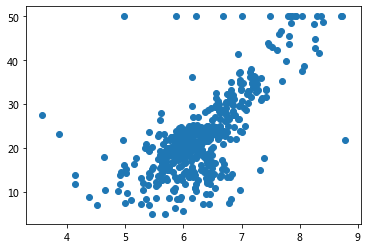

In [174]:
boston = load_boston()
x, y = boston['data'], boston['target']
X_rm = x[:,5]
plt.scatter(X_rm,y)

In [175]:
def price(rm, k, b):
    return k * rm + b

In [188]:
# define loss function 
def loss(y,y_hat):
    return sum(abs(y_i - y_hat_i) for y_i, y_hat_i in zip(list(y),list(y_hat)))/len(list(y))

In [189]:
# you code here
import numpy as np

# define partial derivative 
def partial_derivative_k(x, y, y_hat): 
    n = len(y)
    gradient = 0
    for x_i, y_i, y_hat_i in zip(list(x),list(y),list(y_hat)):
#         if y_i > y_hat_i:
#             gradient += x_i * (-1)
#         else:
#             gradient += x_i
        gradient += np.sign(y_i-y_hat_i) * x_i
    return -1/n * gradient

def partial_derivative_b(y, y_hat):
    n = len(y)
    gradient = 0
    for y_i, y_hat_i in zip(list(y),list(y_hat)):
#         if y_i > y_hat_i:
#             gradient += -1
#         else:
#             gradient += 1
        gradient += np.sign(y_i-y_hat_i)
    return -1 / n * gradient

In [197]:
#initialized parameters

k = random.random() * 200 - 100  # -100 100
b = random.random() * 200 - 100  # -100 100

learning_rate = 1e-3

iteration_num = 10000
losses = []
for i in range(iteration_num):
    
    price_use_current_parameters = [price(r, k, b) for r in X_rm]  # \hat{y}
    
    current_loss = loss(y, price_use_current_parameters)
    losses.append(current_loss)
#     print("Iteration {}, the loss is {}, parameters k is {} and b is {}".format(i,current_loss,k,b))
    
    k_gradient = partial_derivative_k(X_rm, y, price_use_current_parameters)
    b_gradient = partial_derivative_b(y, price_use_current_parameters)
    
    k = k + (-1 * k_gradient) * learning_rate
    b = b + (-1 * b_gradient) * learning_rate
best_k = k
best_b = b

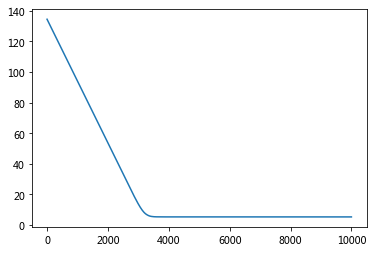

In [198]:
plt.plot(list(range(iteration_num)), losses)

<评阅点>
+ 是否将Loss改成了“绝对值”(3')
+ 是否完成了偏导的重新定义(5')
+ 新的模型Loss是否能够收敛 (11’)